In [1]:
%matplotlib inline
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import pandas_ta as ta
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_pickle("data/btcusd_4h.pkl")
df.columns  = [x.lower() for x in df.columns.tolist()]

In [3]:
df.name = "BTCUSD"

In [4]:
def ctitle(indicator_name, ticker='BTCUSD', length=100):
    return f"{ticker}: {indicator_name} from {recent_startdate} to {recent_startdate} ({length})"

In [5]:
price_size = (16, 8)
ind_size = (16, 2)
ticker = 'BTCUSD'
recent = 126
half_of_recent = int(0.5 * recent)

In [6]:
last_ = df.shape[0]

In [7]:
recent_startdate = df.tail(recent).index[0]
recent_enddate = df.tail(recent).index[-1]

In [8]:
print(f"{df.name}{df.shape} from {recent_startdate} to {recent_enddate}\n{df.describe()}")

BTCUSD(9865, 5) from 2020-03-19 04:00:00 to 2020-04-09 00:00:00
               open          high           low         close       volume
count   9865.000000   9865.000000   9865.000000   9865.000000  9865.000000
mean    4819.660256   4876.866946   4756.385196   4820.376987   158.415493
std     3926.119636   3984.792911   3857.853140   3925.928896   233.410646
min      243.600000    243.600000    236.000000    243.600000     0.000000
25%      741.510000    745.500000    738.600000    741.740000    27.555492
50%     4141.710000   4197.840000   4085.490000   4143.790000    80.077458
75%     7909.980000   7991.670000   7800.150000   7909.980000   194.391764
max    19869.860000  19999.000000  19500.000000  19869.860000  4355.328552


In [9]:
opendf = df['open']
closedf = df['close']
volumedf = df['volume']

In [10]:
help(df.ta.constants) # for more info
df.ta.constants(True, -4, 4)
df.tail()

Help on method constants in module pandas_ta.core:

constants(append, lower_bound=-100, upper_bound=100, every=1) method of pandas_ta.core.AnalysisIndicators instance
    Constants
    
    Useful for creating indicator levels or if you need some constant value
    easily added to your DataFrame.
    
    Add constant '1' to the DataFrame
    >>> df.ta.constants(True, 1, 1, 1)
    Remove constant '1' to the DataFrame
    >>> df.ta.constants(False, 1, 1, 1)
    
    Adding constants that range of constants from -4 to 4 inclusive
    >>> df.ta.constants(True, -4, 4, 1)
    Removing constants that range of constants from -4 to 4 inclusive
    >>> df.ta.constants(False, -4, 4, 1)
    
    Args:
        append (bool): Default: None.  If True, appends the range of constants to the
            working DataFrame.  If False, it removes the constant range from the working
            DataFrame.
        lower_bound (int): Default: -100.  Lowest integer for the constant range.
        upper_bound 

,open,high,low,close,volume,-4,-3,-2,-1,0,1,2,3,4
Date,,,,,,,,,,,,,,
2020-04-08 08:00:00,7323.36,7356.72,7221.54,7295.80,56.911926,-4,-3,-2,-1,0,1,2,3,4
2020-04-08 12:00:00,7295.80,7350.88,7207.50,7283.45,139.221945,-4,-3,-2,-1,0,1,2,3,4
2020-04-08 16:00:00,7283.45,7364.49,7261.61,7320.11,194.391764,-4,-3,-2,-1,0,1,2,3,4
2020-04-08 20:00:00,7320.11,7398.92,7311.33,7369.60,86.062941,-4,-3,-2,-1,0,1,2,3,4
2020-04-09 00:00:00,7369.60,7369.60,7338.23,7338.23,7.788915,-4,-3,-2,-1,0,1,2,3,4


In [11]:
def cscheme(colors):
    aliases = {
        'BkBu': ['black', 'blue'],
        'gr': ['green', 'red'],
        'grays': ['silver', 'gray'],
        'mas': ['black', 'green', 'orange', 'red'],
    }
    aliases['default'] = aliases['gr']
    return aliases[colors]

In [12]:
def machart(kind, fast, medium, slow, append=True, last=last_, figsize=price_size, colors=cscheme('mas')):
    title = ctitle(f"{kind.upper()}s", ticker=ticker, length=last)
    ma1 = df.ta(kind=kind, length=fast, append=append)
    ma2 = df.ta(kind=kind, length=medium, append=append)
    ma3 = df.ta(kind=kind, length=slow, append=append)
    
    madf = pd.concat([closedf, df[[ma1.name, ma2.name, ma3.name]]], axis=1, sort=False).tail(last)
    madf.plot(figsize=figsize, title=title, color=colors, grid=True)    

In [13]:
def volumechart(kind, length=10, last=last_, figsize=ind_size, alpha=0.7, colors=cscheme('gr'), rot=None):
    title = ctitle("Volume", ticker=ticker, length=last)
    volume = pd.DataFrame({'V+': volumedf[closedf > opendf], 'V-': volumedf[closedf < opendf]}).tail(last)    
    volume.plot(kind='bar', figsize=(figsize[0], 2), width=0.5, color=colors, alpha=alpha, stacked=True, rot=rot)

In [14]:
def vadfchart(kind, length=10, last=last_, figsize=ind_size, alpha=0.7, colors=cscheme('gr'), rot=None):
    vadf = df.ta(kind=kind, close=volumedf, length=length).tail(last)
    vadf.plot(figsize=(figsize[0], 2), lw=1.4, color='black', title=title, grid=True, rot=rot)

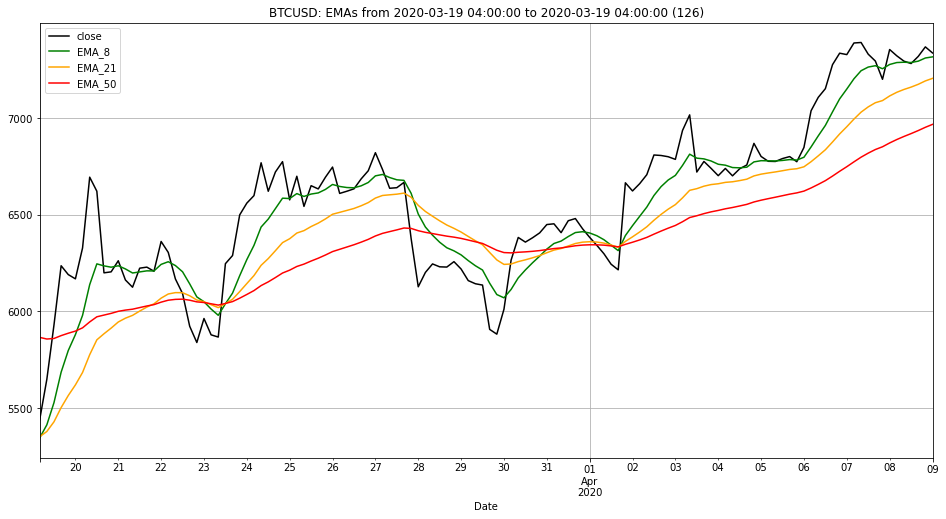

In [15]:
machart('ema', 8, 21, 50, last=recent)

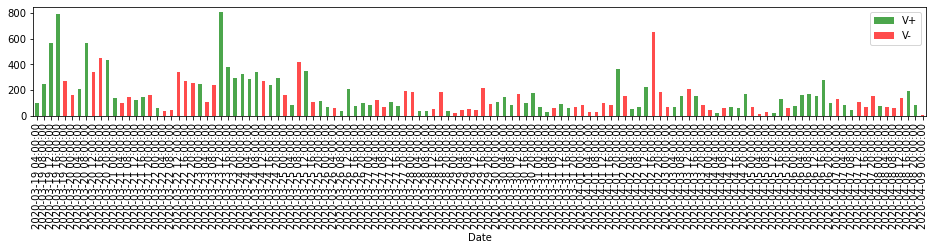

In [16]:
volumechart('ema', last=recent, rot=90)

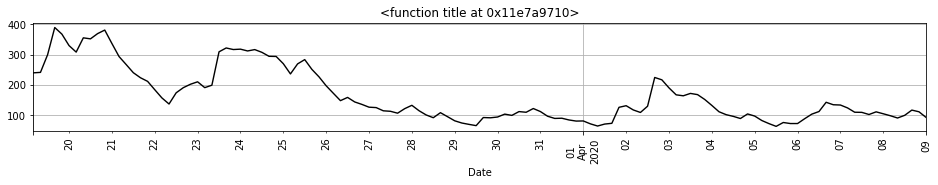

In [17]:
vadfchart('ema', last=recent, rot=90)

# Cumulative Log Return

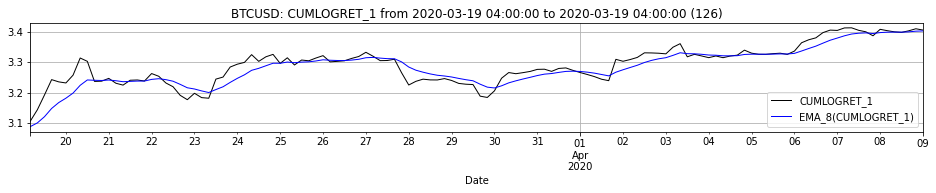

In [18]:
clr_ma_length = 8
clrdf = df.ta.log_return(cumulative=True, append=True)
clrmadf = ta.ema(clrdf, length=clr_ma_length)
qqdf = pd.DataFrame({f"{clrdf.name}": clrdf, f"{clrmadf.name}({clrdf.name})": clrmadf})
qqdf.tail(recent).plot(figsize=ind_size, color=cscheme('BkBu'), linewidth=1, title=ctitle(clrdf.name, ticker=ticker, length=recent), grid=True)